# Declare DPP class(SLOW)

In [1]:
import numpy as np 
from scipy.spatial import distance 
import random as rd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
print("Packages Import")
rd_seed = 1
np.random.seed(rd_seed)
print("Set Random Seed: {}".format(rd_seed))

Packages Import
Set Random Seed: 1


In [2]:
def kernel_se(X1,X2,hyp={'gain':1,'len':1,'noise':1e-8}):
    hyp_gain       = float(hyp['gain'])**2
    hyp_len        = 1/float(hyp['len'])
    pairwise_dists = distance.cdist(X1,X2,'euclidean')
    K = hyp_gain*np.exp(-pairwise_dists ** 2 / (hyp_len**2))
    return K

def Kdpp(x, k):
    # Select _n samples out of _X using K-DPP
    n,d = x.shape[0],x.shape[1]
    mid_dist = np.median(distance.cdist(x, x,'euclidean'))
    out,idx  = np.zeros(shape=(k,d)),[]
    for i in range(k):
        if i == 0:
            # Pick Random Point at first
            rand_idx = np.random.randint(n)
            idx.append(rand_idx) # append index
            out[i,:] = x[rand_idx,:] # append  inputs
        else:
            # Pick Furtest point
            det_vals = np.zeros(n)
            for j in range(n):
                if j in idx:
                    det_vals[j] = -np.inf
                else:
                    idx_temp = idx.copy()
                    idx_temp.append(j)
                    X_curr = x[idx_temp,:]
                    K = kernel_se(X_curr,X_curr,{'gain':1,'len':mid_dist,'noise':1e-4}) # If mid_dist has error, change it to 1
                    det_vals[j] = np.linalg.det(K)

            max_idx = np.argmax(det_vals)
            idx.append(max_idx)
            out[i,:] = x[max_idx,:] # append  inputs
    return out,idx

In [3]:
x_data = np.random.uniform(-2, 2, (2000, 2))
k = 10
_, kidx = Kdpp(x=x_data, k=k) # Original Implementation is SLOW.

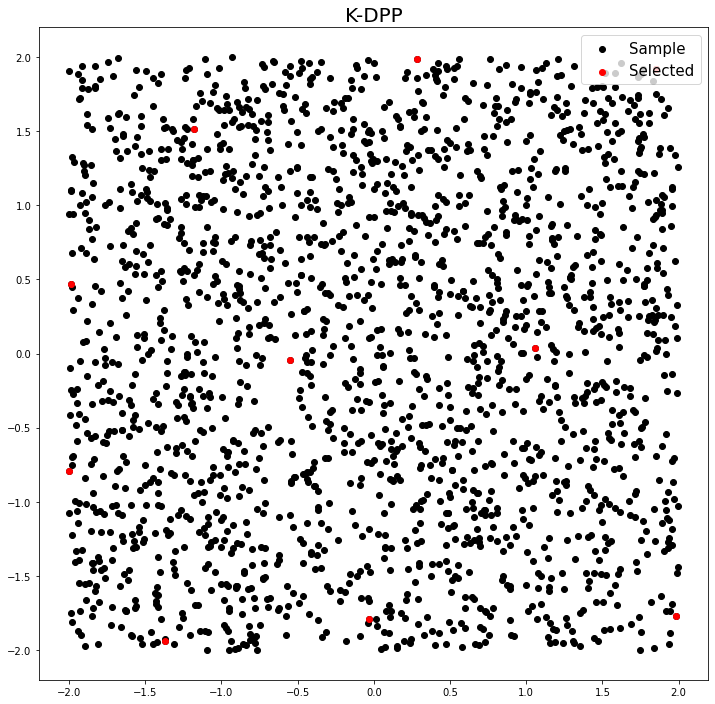

In [4]:
""" Plot """
plt.figure(figsize=(12,12))
plt.scatter(x_data[:,0], x_data[:,1], c='k', label="Sample")
plt.scatter(x_data[kidx,0], x_data[kidx,1], c='r', label="Selected")
plt.title("K-DPP", fontsize=20)
plt.legend(fontsize=15)
plt.show()

# Declare LA-DPP Class(FAST)

In [14]:
def get_median(x):
    D      = distance.cdist(x,x,'euclidean')
    K      = np.exp((D**2))
def LAdpp(x, k,l = 1/1000):
    n      = x.shape[0]
    sum_K  = np.zeros((1,n))
    d      = x.shape[1]
    
    D      = distance.cdist(x,x,'euclidean')
    K      = np.exp(-1/l*(D**2))
    K_     = 0.5*(K+K.T)
    selPoint = np.zeros(shape=(k, d))
    selIdx   = []
    sel_idx  = np.zeros(k)
    remain_idx = np.linspace(0, n-1, n, dtype=int).reshape(-1)

    for k_num in range(k):
        if k_num==0:
            # Pick Random Point at first
            rand_idx = np.random.randint(n)
            selIdx.append(rand_idx) # append index
            selPoint[k_num,:] = x[rand_idx,:] # append  inputs
        else: 
            # Pick Furtest point
            curr_K = K_[selIdx[k_num-1],:]
            sum_K = sum_K+curr_K
            k_val = sum_K[:, remain_idx]
            min_idx = np.argmin(k_val)
            sel_idx = remain_idx[min_idx]
            selIdx.append(sel_idx)
            remain_idx = np.delete(remain_idx, min_idx).reshape(-1)
            selPoint[k_num, :] = x[sel_idx,:] # append a selected point
    return selIdx

In [15]:
""" LA-DPP """
x_data = np.random.uniform(-2, 2, (2000, 2))
k = 128
selidx = LAdpp(x=x_data, k=k)
print(sorted(selidx))


[0, 1, 2, 3, 4, 5, 7, 13, 14, 19, 20, 28, 37, 39, 53, 68, 76, 91, 99, 120, 139, 146, 184, 206, 228, 264, 279, 290, 294, 314, 327, 333, 334, 357, 363, 370, 421, 423, 426, 429, 443, 453, 456, 459, 465, 479, 494, 538, 560, 565, 579, 617, 643, 654, 664, 673, 683, 687, 689, 696, 697, 709, 710, 752, 771, 773, 791, 801, 810, 817, 852, 887, 890, 892, 921, 929, 952, 981, 1032, 1048, 1074, 1097, 1117, 1132, 1143, 1193, 1235, 1237, 1259, 1271, 1295, 1300, 1305, 1337, 1363, 1413, 1439, 1461, 1475, 1510, 1527, 1528, 1533, 1534, 1544, 1549, 1577, 1665, 1724, 1745, 1751, 1752, 1762, 1769, 1772, 1792, 1804, 1822, 1829, 1839, 1864, 1866, 1892, 1893, 1898, 1901, 1944, 1954]


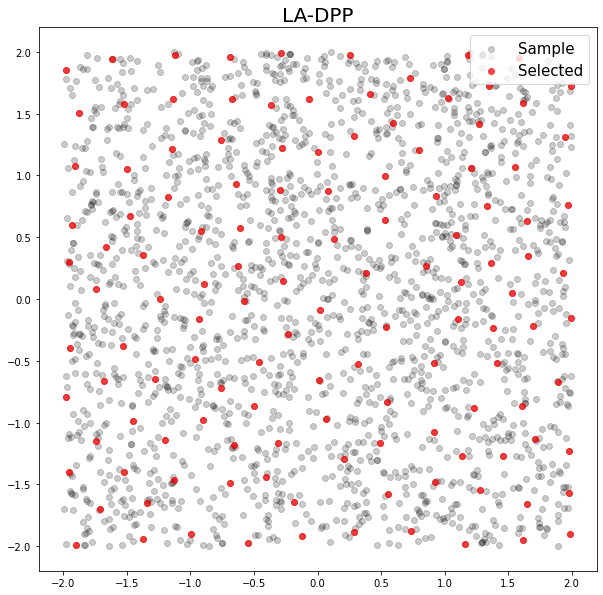

In [16]:
""" Plot """
plt.figure(figsize=(10,10))
plt.scatter(x_data[:,0], x_data[:,1], c='k', alpha=0.2, label="Sample")
plt.scatter(x_data[selidx,0], x_data[selidx,1], c='r', alpha=0.7, label="Selected")
plt.title("LA-DPP", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [17]:
import cv2
from pathlib import Path
imgFolderPath = Path("candidate")

images = []
for i,imgPath in enumerate(imgFolderPath.iterdir()):
    image = cv2.imread(str(imgPath))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(244,244,))
    images.append(image)
images = np.array(images)

(-0.5, 243.5, 243.5, -0.5)

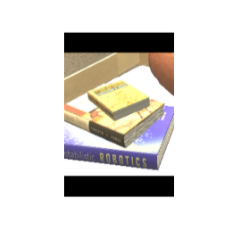

In [18]:
plt.imshow(images[15])
plt.axis('off')

In [19]:
import torchvision.models as models
import torch
vgg16 = models.vgg16()


In [20]:
MEAN,VAR = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225])

imageTensor = torch.tensor(images)
imageTensor = imageTensor.permute((0,3,1,2))
imageTensor = imageTensor/255


In [21]:
# Normalize
inTensor = imageTensor-MEAN[:,None,None]
inTensor = inTensor/VAR[:,None,None]

# VGG
outTensor = vgg16.features(inTensor)
outTensor = vgg16.avgpool(outTensor)
outTensor = torch.flatten(outTensor, 1)
outTensor = vgg16.classifier(outTensor)

In [22]:
""" LA-DPP """
features = outTensor.detach().numpy()
k = 10
selidx = LAdpp(x=features, k=k)
print(sorted(selidx))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 46]


In [23]:
""" TSNE for plotting"""
from sklearn.manifold import TSNE
tsne_features = TSNE(n_components = 2).fit_transform(features)

/home/taerim/.pyenv/versions/3.9.10/envs/ai2thor/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/taerim/.pyenv/versions/3.9.10/envs/ai2thor/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


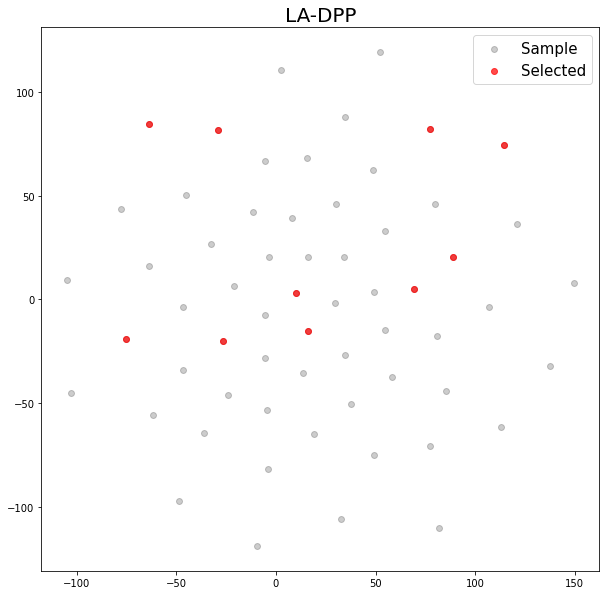

In [24]:
""" Plot """
plt.figure(figsize=(10,10))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c='k', alpha=0.2, label="Sample")
plt.scatter(tsne_features[selidx,0], tsne_features[selidx,1], c='r', alpha=0.7, label="Selected")
plt.title("LA-DPP", fontsize=20)
plt.legend(fontsize=15)
plt.show()

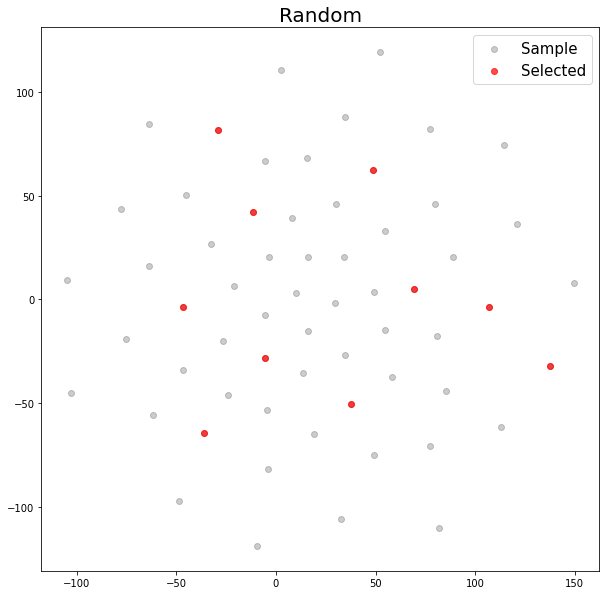

In [26]:
""" Random for comparison """
ranidx = np.random.randint(0,len(features),k)

plt.figure(figsize=(10,10))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c='k', alpha=0.2, label="Sample")
plt.scatter(tsne_features[ranidx,0], tsne_features[ranidx,1], c='r', alpha=0.7, label="Selected")
plt.title("Random", fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [27]:
""" Save Selected images"""
import torchvision
imageSelected = imageTensor[selidx]

savePath = Path("imageSelected")
Path.mkdir(savePath,exist_ok=True)

for i,image in enumerate(imageSelected):
    imagePath = savePath/ "image{}.png".format(i)
    torchvision.utils.save_image(image,imagePath)